In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

files = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_dir = os.path.join(dirname, filename)
        files.append(file_dir)
        print(f"{os.path.join(dirname, filename)} added to files array")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data5g/Theme5/data/2022-07-08-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-07-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-21-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-14-garbo06-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-15-garbo08-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-20-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-08-garbo10-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-22-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-14-garbo11-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-12-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-06-garbo10-combined-kml.csv added to files array
/kaggle/in

In [2]:
print(len(files))

136


In [3]:
#Data Ingestion & Cleaning
#Filter out Invalid GPS Points & Parse timestamps

cleaned_dataframes = []

for file in files:
    data5G = pd.read_csv(file, low_memory=False) #Read csv file and remove warnings
    #GPS Points 
    data5G = data5G[(data5G['latitude'] != 99999) & (data5G['longitude'] != 99999)] #99,999 is used for invalid detection

    #Parse timestamps 
    data5G['time'] = pd.to_datetime(data5G['time'], unit='s', errors='coerce') #Removes invalid values (abc) and converts numeric values into time and date
    data5G = data5G.dropna(subset=['time']) #Removes rows with invalid timestamps

    cleaned_dataframes.append(data5G)

master_data5G = pd.concat(cleaned_dataframes, ignore_index=True)

master_data5G.to_csv('/kaggle/working/master_data5G.csv', index=False) #Convert to a master csv 

print("Data cleaning completed and saved as'master_data5G.csv'")

    
    

Data cleaning completed and saved as'master_data5G.csv'


In [4]:
#Data Pre-Processing
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/working/master_data5G.csv', low_memory=False) #Read new CSV created


df.head() #Show the first 5 rows


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
0,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data structure & types
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042495 entries, 0 to 3042494
Data columns (total 32 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   Day               object 
 2   Year              float64
 3   Month             float64
 4   Date              float64
 5   hour              float64
 6   min               float64
 7   sec               float64
 8   timezone          object 
 9   latitude          float64
 10  longitude         float64
 11  speed             float64
 12  truck             object 
 13  svr1              float64
 14  svr2              float64
 15  svr3              float64
 16  svr4              float64
 17  Role              object 
 18  Transfer size     float64
 19  Transfer unit     object 
 20  Bitrate           float64
 21  bitrate_unit      object 
 22  Retransmissions   object 
 23  CWnd              object 
 24  cwnd_unit         object 
 25  Role-RX           object 
 26  Transfer size-

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
count,3042495,2698689,2698689.0,2698689.0,2.698689e+06,2.698688e+06,2.698688e+06,2.698688e+06,2698688,2.698686e+06,...,2711704,2711701,2713536,2713462,2.713460e+06,2713463,2.713460e+06,2713463,2.788962e+06,2481677
unique,592403,5,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,730,824,1,3,NaN,1,NaN,1,NaN,298
top,2022-07-08 01:47:11,Mon,NaN,NaN,NaN,NaN,NaN,NaN,AEST,NaN,...,0.0,0.0,MBytes,RX-C,NaN,MBytes,NaN,Mbits/sec,NaN,square_111669149768
freq,47,590206,NaN,NaN,NaN,NaN,NaN,NaN,2698686,NaN,...,1946026,984097,2713536,2711630,NaN,2713463,NaN,2713463,NaN,82225
mean,NaN,NaN,2022.0,7.0,1.218967e+01,8.817216e+00,2.961934e+01,2.948782e+01,NaN,-2.737269e+01,...,NaN,NaN,NaN,NaN,2.014400e+00,NaN,1.689644e+01,NaN,2.996928e-01,NaN
std,NaN,NaN,0.0,0.0,6.021038e+00,2.308625e+00,1.745151e+01,1.731720e+01,NaN,3.622062e+01,...,NaN,NaN,NaN,NaN,1.992016e+00,NaN,1.661119e+01,NaN,9.339412e-01,NaN
min,NaN,NaN,2022.0,7.0,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.782882e+01,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,2022.0,7.0,6.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,NaN,-3.778170e+01,...,NaN,NaN,NaN,NaN,7.460938e-01,NaN,6.260000e+00,NaN,0.000000e+00,NaN
50%,NaN,NaN,2022.0,7.0,1.200000e+01,9.000000e+00,3.000000e+01,2.900000e+01,NaN,-3.775104e+01,...,NaN,NaN,NaN,NaN,1.470000e+00,NaN,1.230000e+01,NaN,3.130817e-02,NaN
75%,NaN,NaN,2022.0,7.0,1.800000e+01,1.100000e+01,4.500000e+01,4.400000e+01,NaN,-3.771678e+01,...,NaN,NaN,NaN,NaN,2.900000e+00,NaN,2.430000e+01,NaN,2.629497e-01,NaN


time                     0
Day                 343806
Year                343806
Month               343806
Date                343806
hour                343807
min                 343807
sec                 343807
timezone            343807
latitude            343809
longitude           343809
speed               343810
truck               343812
svr1                593975
svr2                593975
svr3                593975
svr4                593977
Role                328960
Transfer size       328962
Transfer unit       328959
Bitrate             328962
bitrate_unit        328959
Retransmissions     330791
CWnd                330794
cwnd_unit           328959
Role-RX             329033
Transfer size-RX    329035
Transfer unit-RX    329032
Bitrate-RX          329035
bitrate_unit-RX     329032
send_data           253533
square_id           560818
dtype: int64


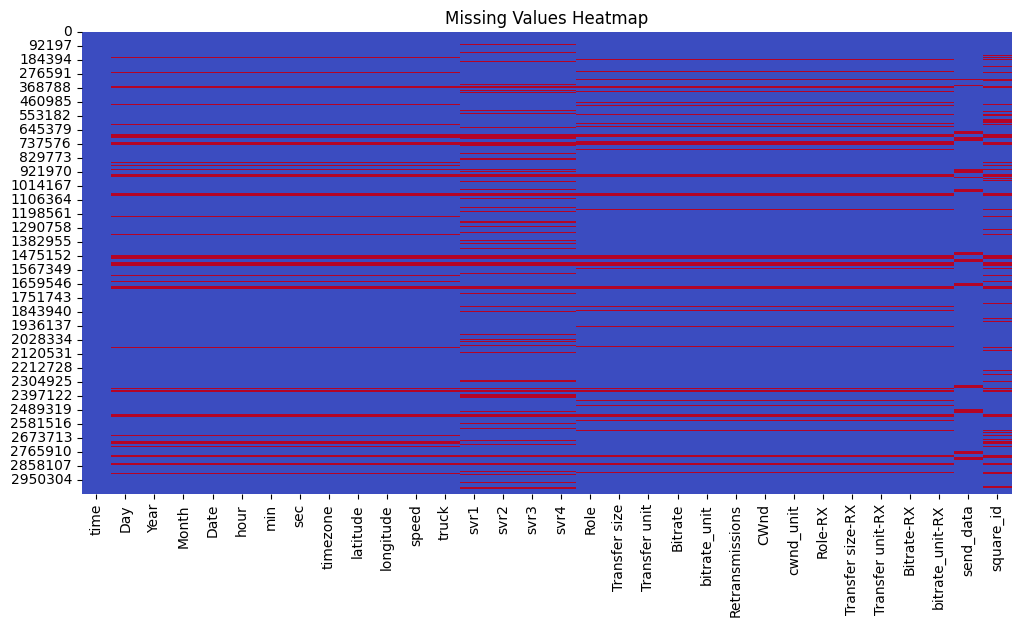

In [6]:
#Total missing values per column
print(df.isnull().sum())

#Visual heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm") #Red = Missing, Blue = Present
plt.title("Missing Values Heatmap")
plt.show()
#Cleandata_csv has been removed -- Less missing values 

In [8]:
#Missing-Value Strategy 
#Check missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#Drop columns with >60% missing values
threshold = 60
drop_cols = missing_percent[missing_percent > threshold].index
df = df.drop(columns=drop_cols)
